# Домашняя работа №2. Корреляция, доверительные интервалы.

**Disclaimer**: 

Для каждой домашней работы обозначаются мягкие и жесткие дедлайны. За каждый день просрочки после мягкого дедлайна снимается 20% от оценки.

После жёсткого дедлайна работы не принимаются. Даже при опоздании на одну секунду. Сдавайте заранее.

Cтудент может 1 раз сдать домашнее задание после мягкого дедлайна (но до жёсткого) без штрафов.

В случае использования больших языковых моделей (large language models (LLMs), к примеру: ChatGPT, GigaChat, Qwen, etc):
- В chunk (ячейку) выше кода, созданного LLM, прикрепляйте промпт, который использовался для генерации.
- Отдельно опишите как подбирали промпты, какие заметили преимущества и недостатки GenAI для данного задания.
- За решение с указанным промптом - _штраф 40%_ для конкретного задания, который может быть пересмотрен в сторону увеличения в следующих случаях: 
    - использован ответ LLM без указания промпта _(штраф 100%)_
    - решение избыточно и, или написано неоптимально (использование magic команд без необходимости, использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, etc) _(штраф 50%)_

Также: 
- Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.
- Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.
- Мы в любом случае оставляем за собой право пригласить студента для защиты своего ДЗ, если заподозрим плагиат.

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков

## Задание 1. Лабораторная работа по корреляциям (50 баллов)

Недавнее исследование (которое более правильно назвать сравнением) показало, что совершенно разные значения коэффициентов корреляции могут говорить о наличии и отсутсвии зависимости https://astralcodexten.substack.com/p/attempts-to-put-statistics-in-context.
Для наработки определённой интуиции о наличии или отсутвии корреляции в данных, предлагается сделать следующую лабораторную работу.

* **(10 баллов)** Сгенерируйте две выборки размера 100: одну из нормального распределения со средним 0 и дисперсией 0.64, другую из нормального со средним 0 и дисперсией 0.25. Обозначим эти выборки как $X_1$ и $X_2$. Эти выборки мы менять не будем, их нужно сгенерировать один раз.

    Пусть $Z_1 = X_1$ и $Z_2 = (X_2)^3$. Постройте рядом (при помощи plt.subplot) два scatter plot: $Z_1$ от $X_1$ и $Z_2$ от $X_2$. Посчитайте коэффициенты корреляции Пирсона и Спирмена для каждой пары, выведите их в заголовке

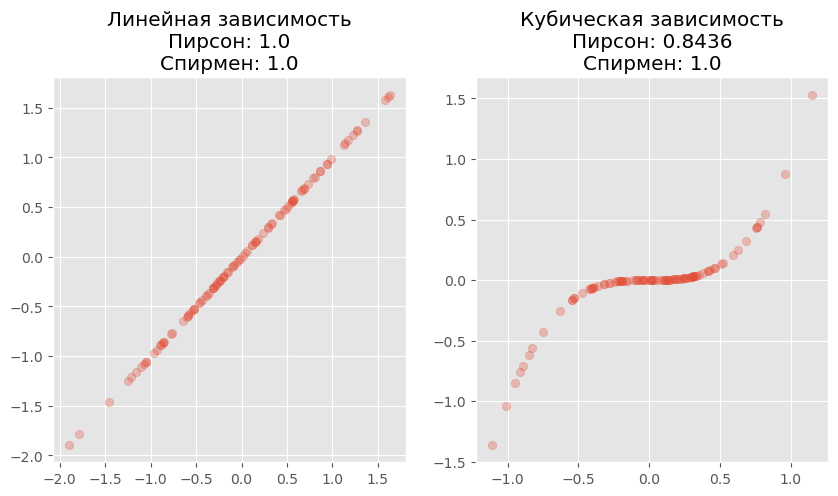

In [67]:
# должно получиться примерно так

* **(15 баллов)** Попортим наши выборки: будем добавлять к каждой из них будем добавлять нормальный шум (выборку из стандартного нормального распределения) с коэффициетом. То есть нужно получить выборки такого вида: $Y_i = Z_i + k \cdot stats.norm().rvs(100)$. 

    Попробуйте взять не менее 5 значений $k$ из диапазона $[0.1, 2]$
    
    Сделайте выводы на основе наблюдений: при каком k пропадает визульно зависимость, какой при этом коэффициент корреляции? Влияет ли первоначальный вид зависимости на величину коэффициентов корреляции? Есть ли сильные отличия в коэффициентах корреляции Пирсона и Спирмена в рамках одной выборки?

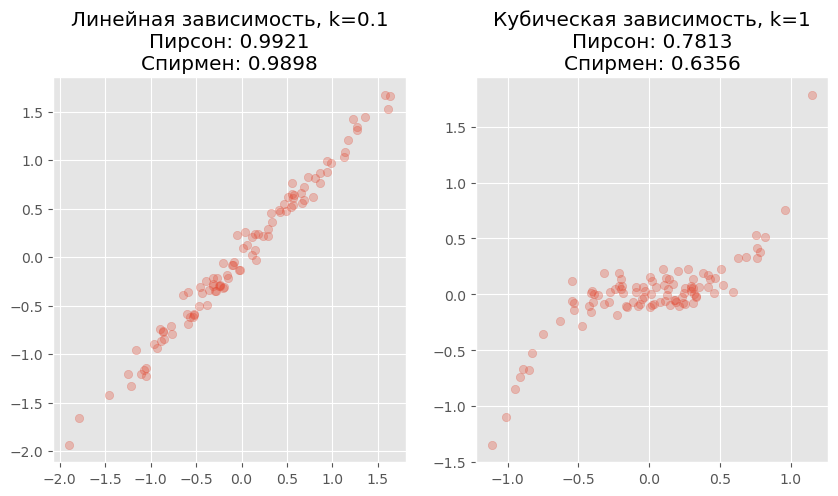

In [66]:
# пример графика

* **(15 баллов)** Для каждого вида зависимости из прошлого пункта постройте график зависимости коэффициента корреляции Пирсона и Спирмена в зависимости от уровня шума (от $k$). По своей сути, повторите исследование из прошлого пунта, но переберите не 5 значений $k$, а сделайте более плотную сетку (например, при помощи `np.linspace(0.1, 2, 100)`), и для каждого значения $k$ сохраните соответсвующий коэффициент корреляции, затем выведите их на графике. Для примера см. график зависимости ширины ДИ от уровня доверия из 4го семинара.

* **(10 баллов)** Теперь проверьте устойчивость коэффициента корреляции Спирмена к выбосам. Для этого к одному или двум значениям выборки $Z_1$ и $Z_2$ (или к исходным  $X_1$ и $X_2$) добавьте константу. Проверьте, как будет меняться коэффициент корреляции Пирсона и Спирмена при изменении данной константы (постройте график зависимости коэффициента корреляции от величины выброса). Попробуйте найти такое значение выброса, при котором коэффициент корреляции Пирсона получается как при большом шуме.

Сделайте выводы о том, насколько теория, рассказанная на лекции, согласуется с вашими результатами.

## Задание 2. Соцопрос (25 баллов)

Оригинальная статья (не советую читать сразу выводы из-за спойлеров): https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0153419

**Определение:**
    Булщит — бессодержательное, нелогичное или явно противоречащее элементарным научным знаниям утверждение. Например: *"Скрытый смысл трансформирует беспрецедентную абстрактную красоту"*

Испытуемые: 196 граждан Америки, набранные на Amazon Mechanical Turk.

Задание для испытуемых:

1. Оценить глубокомысленность утверждений по шкале от 1 (“абсолютно не глубокое”) до 5 (“очень глубокое”)

2. Оценить степень симпатии к трём кандидатам в президенты США от демократической и трём — от республиканской партий по шкале от 1 (“очень несимпатичен”) до 5 (“очень симпатичен”)

3. Оценить степень консервативности собственных политических взглядов по семибалльной шкале Лайкерта.

Часть утверждений, оцениваемых респондентами была булщитом, часть — относительно редкими поговорками.

In [ ]:
data = pd.read_csv('bullshit.csv', index_col=0)

* **(10 баллов)** Исследуйте состав датасета. Определите возрастную категорию респондетов, посмотрите на распределение по возрасту, полу (1 - мужской, 2-женский), сравните (при помощи Google) со средними значениями по Америке. На основании этого предположите, является ли выборка репрезентативной.

* **(15 баллов)** Посмотрите на корреляцию между средней воспреимчивостью к буллщиту (`MeanBullshit`) и предпочтительностью каждого из кандидатов. Сопроводите сравнение не только численными значениями коэффициентов корреляции, но и графиками (например, `jointplot`). Предпочтения к какому кандидату наиболее коррелируют с воспреимчивостью к буллщиту? Как вам кажется: это прямая зависимость, или есть какой-то фактор (из приведённых в датасете), который также хорошо скоррелирован с предпочтением этого кандидата и воспреимчивостью к буллщиту, который может объяснить наличие такой корреляции? Если такой фактор найдётся, приведите соответствующие значения коэффициентов корреляции.

* **(дополнительные 10 баллов)** Используя лекцию про проверку гипотез, зная, что нулевая гипотеза у критериев на основе коэффициентов корреляции Пирсона и Спирмена: корреляция отсутствует, а второе значение у результата вызова `stats.pearsonr`/`stats.spearmanr` - это p-value данных критериев, проверьте ваши выводы в предыдущем пункте на статзначимость.

## Задание 3. Квартиры и доверительные интервалы (50 баллов)

Представим себя риелторами, работающими на продажах квартир в Москве. Будем работать с данными по стоимости квартир в москве из таблички `flat.csv`.

In [69]:
df = pd.read_csv('flat.csv', sep='\t')

__Описание переменных:__

```
n – номер квартиры по порядку
price – цена квартиры в $1000
totsp – общая площадь квартиры, кв.м.
livesp жилая площадь квартиры, кв.м.
kitsp – площадь кухни, кв.м.
dist – расстояние от центра в км.
metrdist – расстояние до метро в минутах
walk – 1 – пешком от метро, 0 – на транспорте
brick 1 – кирпичный, монолит ж/б, 0 – другой
floor 1 – этаж кроме первого и последнего, 0 – иначе.
code – число от 1 до 8, при помощи которого мы группируем наблюдения по
подвыборкам:
1. Наблюдения сгруппированы на севере, вокруг Калужско-Рижской линии
метрополитена
2. Север, вокруг Серпуховско-Тимирязевской линии метрополитена
3. Северо-запад, вокруг Замоскворецкой линии метрополитена
4. Северо-запад, вокруг Таганско-Краснопресненской линии метрополитена
5. Юго-восток, вокруг Люблинской линии метрополитена
6. Юго-восток, вокруг Таганско-Краснопресненской линии метрополитена
7. Восток, вокруг Калиниской линии метрополитена
8. Восток, вокруг Арбатско-Покровской линии метрополитена
```

Все доверительные интервалы будем строить с уровнем доверия 95%.

* **(5 баллов)** Снова поисследуйте датасет, посмотрите на распределение цен на квартиры в целом и по районам. Есть ли выбросы? Можно ли его считать нормальным?

* **(10 баллов)** Посмотрите, насколько сильно коррелирует стоимость квартиты с площадью (общей или какой-либо составной части) и расстоянием от центра и расстоянием до метро в минутах. Сделайте выводы.

* **(5 баллов)** При помощи построения ДИ для среднего ответьте на вопрос: на какой в среднем диапазон цен стоит расчитывать при покупки квартиры в Москве?

* **(15 баллов)** При помощи построения ДИ для разности средних ответьте на вопросы: значимо ли отличается средняя цена на квартиру в зависимости от близости к метро (пешком или на транспорте)? От того, находится ли квартира на первом этаже или нет? Кирпичный или монолитный дом?

* **(15 баллов)** Постройте доверительный интевал для каждого из 8 районов в отдельности. Нанесите их на один общий график. Также на этом графике нанестите среднюю стоимость квартиры в Москве. Красиво подпишите оси (одну из них - названиями районов)

    Про какие районы можно сказать, что квартиры в них значимо стоят выше или ниже среднего? В каких районах самый дешёвые или дорогие квартиры?

    *Hint:* Для построения ДИ удобно пользоваться функцией `plt.errorbar`, можете почитать про неё (или же пользоваться чем хочется). 
    Как пример: `plt.errorbar(<средние цены по району>, np.arange(<число районов>),  xerr=<величина отклонения от среднего (половина ширины ДИ) для каждого из района>, capsize=0, fmt="o")`

* **(0.1 балла)** Опишите в стихотворной форме процесс выполнения данной домашней работы